In [1]:
import csv
%matplotlib inline
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

DIR_NAME = './flow_size/'
FIG_SIZE = (10, 5)


def filter_files(filenames, filter_rules=None, separator=None):
    if filter_rules  is None:
        filter_rules = [('*', '', 'default')]  # (positive-key, negative-key, alias)
    if separator is None:
        separator = ''
    filenames_dict = {}
    for filter_rule in filter_rules:
        filenames_dict[filter_rule[2]] = []
    for filename in filenames:
        if os.path.splitext(filename)[1] != '.csv':
            continue
        filename_split = filename.rstrip('.csv').split(separator)
        for filter_rule in filter_rules:
            if filter_rule[0] in filename_split and filter_rule[1] not in filename_split:
                filenames_dict[filter_rule[2]].append(filename)
                break
    return filenames_dict

{'om-aeap': ['b_fz_t1_n20_rrg_backtracking_lrf_aeap.csv'], 'op': [], 'd-aeap': ['b_fz_t1_n20_rrg_dijkstra_lrf_aeap.csv']}


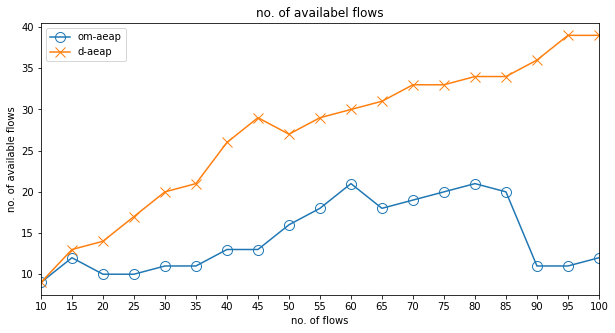

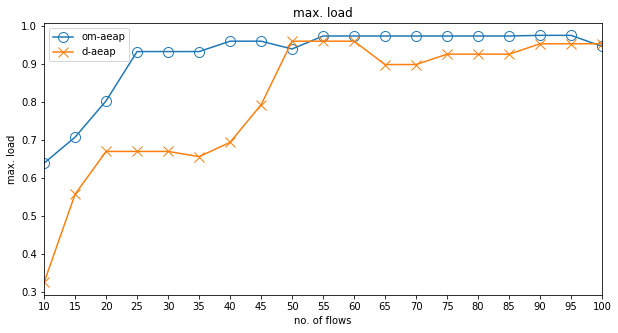

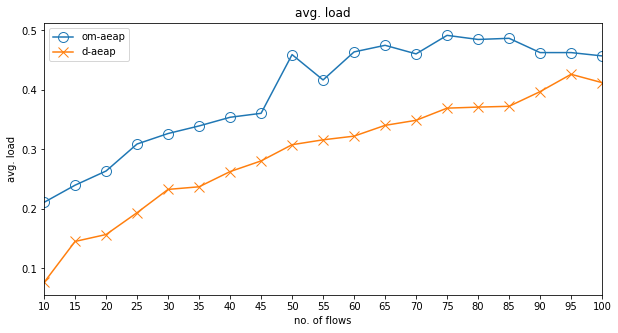

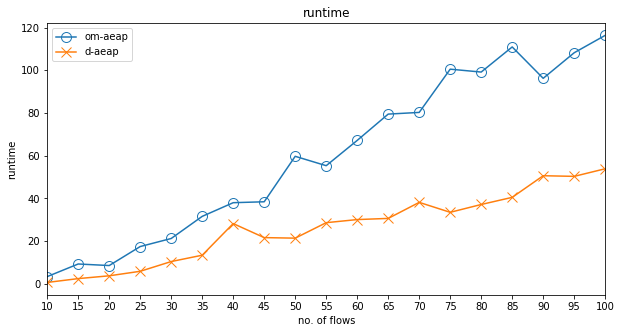

In [2]:
        
def v_flow_size(filenames_dict):
    fig_1, ax_1 = plt.subplots(figsize=FIG_SIZE)  # no. of availabel flows
    ax_1.set_title('no. of availabel flows')
    fig_2, ax_2 = plt.subplots(figsize=FIG_SIZE)  # max. load 
    ax_2.set_title('max. load')
    fig_3, ax_3 = plt.subplots(figsize=FIG_SIZE)  # avg. load
    ax_3.set_title('avg. load')
    fig_4, ax_4 = plt.subplots(figsize=FIG_SIZE)  # runtime
    ax_4.set_title('runtime')
    all_no_of_flow_dict = {}
    all_no_of_availabel_flows_dict = {}
    all_max_load_dict = {}
    all_avg_load_dict = {}
    all_runtime_dict = {}
    for alias in filenames_dict.keys():
        all_no_of_flow_dict[alias] = []
        all_no_of_availabel_flows_dict[alias] = []
        all_max_load_dict[alias] = []
        all_avg_load_dict[alias] = []
        all_runtime_dict[alias] = []
    for alias, filenames in filenames_dict.items():
        for filename in filenames:
            no_of_flow_list = []
            no_of_availabel_flows_list = []
            max_load_list = []
            avg_load_list = []
            runtime_list = []
            with open(os.path.join(DIR_NAME, filename), 'r') as file:
                reader = csv.reader(file)
                for line in reader:
                    no_of_flow_list.append(int(line[0]))
                    no_of_availabel_flows_list.append(int(line[3]))
                    max_load_list.append(float(line[7]))
                    avg_load_list.append(float(line[9]))
                    runtime_list.append(float(line[6]))
                    all_no_of_flow_dict[alias].append(no_of_flow_list)
                    all_no_of_availabel_flows_dict[alias].append(no_of_availabel_flows_list)
                    all_max_load_dict[alias].append(max_load_list)
                    all_avg_load_dict[alias].append(avg_load_list)
                    all_runtime_dict[alias].append(runtime_list)
    for alias in filenames_dict.keys():
        if len(all_no_of_availabel_flows_dict[alias]) == 0:
            continue
        all_no_of_flow_array = np.array(all_no_of_flow_dict[alias]).T
        all_no_of_availabel_flows_array = np.array(all_no_of_availabel_flows_dict[alias]).T
        all_max_load_array = np.array(all_max_load_dict[alias]).T
        all_avg_load_array = np.array(all_avg_load_dict[alias]).T
        all_runtime_array = np.array(all_runtime_dict[alias]).T
        avg_no_of_flow_array = all_no_of_flow_array.mean(axis=1)
        avg_no_of_availabel_flows_array = all_no_of_availabel_flows_array.mean(axis=1)
        avg_max_load_array = all_max_load_array.mean(axis=1)
        avg_avg_load_array = all_avg_load_array.mean(axis=1)
        avg_runtime = all_runtime_array.mean(axis=1)
        # draw plot
        x = np.array(avg_no_of_flow_array)
        tick_spacing = 5
        markers = {'om-aeap': 'o', 'd-aeap': 'x', 'op': '+'}
        # no. of availabel flows
        ax_1.plot(x, avg_no_of_availabel_flows_array, label='{}'.format(alias), 
                  marker=markers[alias], markersize=10, markerfacecolor='none')
        ax_1.set_xlim(x[0], x[-1])
        ax_1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
        ax_1.set_xlabel('no. of flows')
        ax_1.set_ylabel('no. of available flows')
        ax_1.legend()
        # max. load
        ax_2.plot(x, avg_max_load_array, label='{}'.format(alias), 
                  marker=markers[alias], markersize=10, markerfacecolor='none')
        ax_2.set_xlim(x[0], x[-1])
        ax_2.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
        ax_2.set_xlabel('no. of flows')
        ax_2.set_ylabel('max. load')
        ax_2.legend()
        # avg. load
        ax_3.plot(x, avg_avg_load_array, label='{}'.format(alias), 
                  marker=markers[alias], markersize=10, markerfacecolor='none')
        ax_3.set_xlim(x[0], x[-1])
        ax_3.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
        ax_3.set_xlabel('no. of flows')
        ax_3.set_ylabel('avg. load')
        ax_3.legend()
        # runtime
        ax_4.plot(x, avg_runtime, label='{}'.format(alias), 
                  marker=markers[alias], markersize=10, markerfacecolor='none')
        ax_4.set_xlim(x[0], x[-1])
        ax_4.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
        ax_4.set_xlabel('no. of flows')
        ax_4.set_ylabel('runtime')
        ax_4.legend()
                    
        

filenames = os.listdir(DIR_NAME)
filenames_dict = filter_files(filenames,  filter_rules=[
    ('backtracking', 'o', 'om-aeap'), ('o', 'b', 'op'), ('dijkstra', 'o', 'd-aeap')], separator='_')

v_flow_size(filenames_dict)